In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
f_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = f_mnist.load_data()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train_images=train_images/255.0
test_images=test_images/255.0

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [7]:
model.compile(optimizer=tf.optimizers.Adam(),
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [8]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 56s 29ms/step - loss: 0.4391 - accuracy: 0.8401
Epoch 2/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2947 - accuracy: 0.8923
Epoch 3/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2478 - accuracy: 0.9089
Epoch 4/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2142 - accuracy: 0.9204
Epoch 5/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1905 - accuracy: 0.9293


In [9]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.2548 - accuracy: 0.9047


[0.2547558546066284, 0.904699981212616]

Visualization

In [10]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 21ms/step


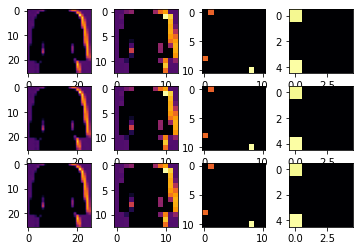

In [17]:
from tensorflow.keras import models
f,axarr=plt.subplots(3,4)
first_image=4
second_image=7
third_image=26
convolution_number =4

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input,outputs=layer_outputs)

for x in range(0,4):
    f1=activation_model.predict(test_images[first_image].reshape(1,28,28,1))[x]
    axarr[0,x].imshow(f1[0,:,:,convolution_number],cmap="inferno")
    axarr[0,x].grid(False)
    f2=activation_model.predict(test_images[second_image].reshape(1,28,28,1))[x]
    axarr[1,x].imshow(f1[0,:,:,convolution_number],cmap="inferno")
    axarr[1,x].grid(False)
    f3=activation_model.predict(test_images[third_image].reshape(1,28,28,1))[x]
    axarr[2,x].imshow(f1[0,:,:,convolution_number],cmap="inferno")
    axarr[2,x].grid(False)